### Linear Regression and Train/Test Split challenges


Ideally, try these with your own data! (Alternatively, there is the
`2013_movies.csv` data set.)


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?


#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?


#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.


#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.


In [1]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('challenges_data/2013_movies.csv')

In [3]:
df.shape

(100, 7)

Challenge 1

In [4]:
constant = np.ones([100,1], dtype = float, order = 'F_contiguous')

In [5]:
df['constant'] = constant

In [6]:
y = df['DomesticTotalGross']
X = df['constant']
Xy = pd.concat([df['constant'], df['DomesticTotalGross']], axis = 1)

In [7]:
m = LinearRegression()
X = X.values.reshape(-1, 1)

In [8]:
m.fit(X,y)
m.score(X,y)
y_pred = m.predict(X)

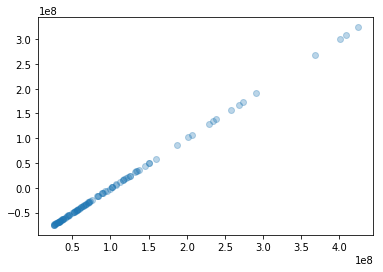

In [9]:
plt.scatter(y, y - y_pred, alpha = 0.3)

(array([47., 21., 15.,  3.,  3.,  4.,  3.,  0.,  1.,  3.]),
 array([-7.50286242e+07, -3.51186446e+07,  4.79133498e+06,  4.47013146e+07,
         8.46112942e+07,  1.24521274e+08,  1.64431253e+08,  2.04341233e+08,
         2.44251213e+08,  2.84161192e+08,  3.24071172e+08]),
 <a list of 10 Patch objects>)

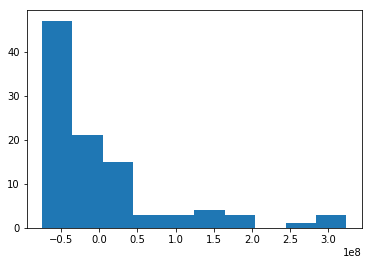

In [10]:
plt.hist(y - y_pred)

Challenge 2

In [11]:
continous = np.linspace(1,100,100)

In [12]:
df['continous'] = continous

In [13]:
m2 = LinearRegression()
m2 = m2.fit(X,y)

In [14]:
X2 = pd.concat([df['constant'],df['continous']], axis = 1)

In [15]:
m2.fit(X2,y)
m2.score(X2,y)

0.6935928820730373

In [16]:
y2_pred = m2.predict(X2)

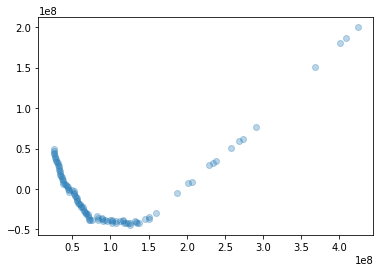

In [17]:
plt.scatter(y, y - y2_pred, alpha = 0.3)

(array([44., 18., 16., 15.,  3.,  0.,  0.,  1.,  0.,  3.]),
 array([-4.44220622e+07, -1.99915787e+07,  4.43890478e+06,  2.88693883e+07,
         5.32998718e+07,  7.77303553e+07,  1.02160839e+08,  1.26591322e+08,
         1.51021806e+08,  1.75452289e+08,  1.99882773e+08]),
 <a list of 10 Patch objects>)

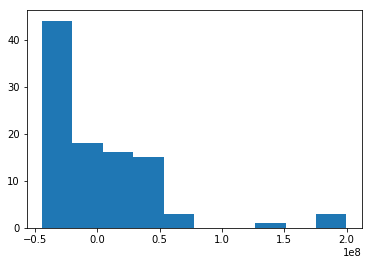

In [18]:
plt.hist(y - y2_pred)

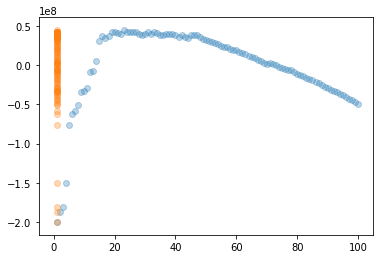

In [19]:
plt.scatter(df['continous'], y2_pred- y, alpha = 0.3)
plt.scatter(df['constant'], y2_pred - y, alpha = 0.3)

(array([ 3.,  0.,  1.,  0.,  0.,  3., 15., 16., 18., 44.]),
 array([-1.99882773e+08, -1.75452289e+08, -1.51021806e+08, -1.26591322e+08,
        -1.02160839e+08, -7.77303553e+07, -5.32998718e+07, -2.88693883e+07,
        -4.43890478e+06,  1.99915787e+07,  4.44220622e+07]),
 <a list of 10 Patch objects>)

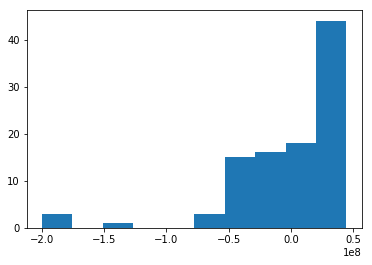

In [20]:
plt.hist(y2_pred - y)

In [21]:
df_director_dummies = pd.get_dummies(df['Director'], drop_first=True)

In [22]:
df_director_dummies.head(5)

,Alan Taylor,Alfonso Cuaron,Andres Muschietti,Andrew Niccol,Antoine Fuqua,Baltasar Kormakur,Barry CookNeil Nightingale,Baz Luhrmann,Ben Stiller,Brad Anderson,...,Spike Jonze,Stephen Frears,Steve McQueen (II),Steven Soderbergh,Thor Freudenthal,Todd Phillips,Tommy Wirkola,Tyler Perry,Woody Allen,Zack Snyder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
X3 = pd.concat([df_director_dummies,df['constant'], df['continous']], axis = 1)

In [24]:
m3 = LinearRegression()
m3.fit(X3,y)
m3.score(X3,y)

0.999421593679638

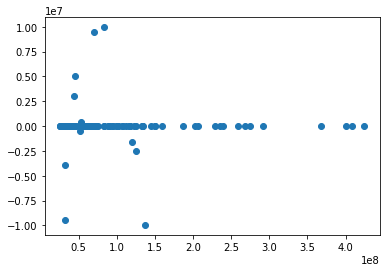

In [25]:
y3_predict = m3.predict(X3)
plt.scatter(y, y3_predict - y)

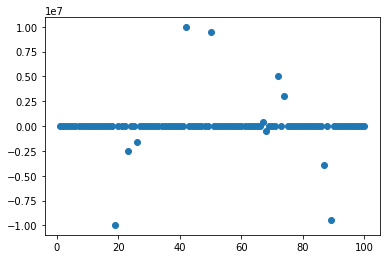

In [26]:
plt.scatter(df['continous'], y3_predict - y)

(array([ 2.,  0.,  0.,  2.,  9., 83.,  1.,  1.,  0.,  2.]),
 array([-9.95210088e+06, -7.96168070e+06, -5.97126053e+06, -3.98084035e+06,
        -1.99042018e+06, -1.23679638e-06,  1.99042018e+06,  3.98084035e+06,
         5.97126053e+06,  7.96168070e+06,  9.95210088e+06]),
 <a list of 10 Patch objects>)

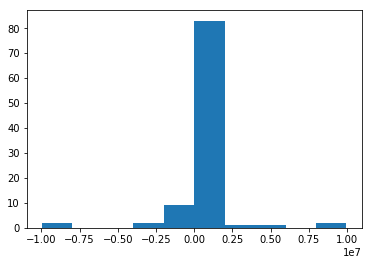

In [28]:
plt.hist(y3_predict - y)

Challenge 5

In [30]:
from sklearn.model_selection import train_test_split

X3, X3_test, y, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 10)

In [37]:
m3.fit(X3,y)
print(m3.score(X3,y))
print(m3.score(X3_test,y_test))

0.9995105733827865
0.3592532335759471
